# Term Structure Analysis using PCA

*by Andre Sealy*

# What is Principal Component Analysis?

In statistics, dimensionality reduction is the transformation of data such that the number of variables is reduced by obtaining principal variables. It can be helpful in the further processing of the data using standard supervised or unsupervised machine learning algorithms, especially those that are dimensionality sensitive (e.g. k-nearest neighbours algorithm). There are two techniques of dimensionality reduction that can be applied to the feature space:

* **Feature Selection**: the process of selection of a subset of relevant features, which can be done manually based on domain knowledge or using statistical tools

* **Feature Projection**: converts data from high-dimensional space to low-dimensional space. The data transformation can be linear or nonlinea


**Principal Component Analysis (PCA)** is a classical method for dimensioin reduction. It uses the first several principal components, statistical features that explain most of the variation of a $m \times n$ data matrix $X$, to describe the large-scale data matrix $X$ economically.

The goal of PCA is to find an alternative representation of data $X$ in the transformed
space so that $X$ can be approximated by variables of smaller dimensions while maintaining
a given level of the original information.

We us denote a zero mean p-dimensional **feature space** $X=(X_1,\ldots,X_p)$. We aim to
obtain a linear transformation V such that the p-dimensional transformed feature variable $Z:=XV$ consists of components orthogonal to each other, and the variances of those components are in descending order. Alternatively, we are aiming to find the representation of $X:\quad X=ZV^{-1}$ can be seen as a projection onto a new feature space, on which dimensionality reduction approach can be built.

## Linear Transformation

Let $V=(v_1,\ldots,v_p)$ be the **loading matrix** with $v_k=(v_{1k}, v_{2k}, \ldots, v_{pk})^{T}$ then the linear transformation of $X$ with $V$ is $Z=XV$ and $V$ should satisfy the following

1. The Euclidean norm: $\lVert xv_k\rVert^2=1,\forall\in 1,\ldots,p$
2. The direction of $V$ is chosen such that the transformed variables $\lbrace Z_k\rbrace_{k=1}^{p}$ should all be orthangonal to each other
3. The variance are in descending order: $\Bbb{V}(Z_1)\geq\Bbb{V}(Z_2)\geq\ldots\Bbb{V}(Z_p)$

## Covariance and the Principal Components

Lets go over some basic definitions from probability theory and statistics.

For the vector $(X_1,\ldots,X_k)^{T}$ of $k$k jointly distributed random variables with finite second moments, its auto-covariance matrix $K_{XX}$ (also denoted as $\Sigma_X$) is defined as follows:

$$
\begin{equation}
    \tag{1}
    \begin{aligned}
K_{XX}= &\text{ Cov}(X,X) \\ 
      = & \text{ E}\big[(X-\text{E}[X])(X-\text{E}[X])^{T}\big] \\
      = & \text{ E}\big[XX^T\big]-E\big[X\big]\text{E}\big[X\big]^{T}
    \end{aligned}
\end{equation}
$$

Let $X$ be a random vector with covariance matrix $\Sigma_X$, and let $A$ be a matrix that can
act on $X$ on the left. The covariance matrix of the matrix-vector product $AX$ is the following:

$$
\begin{equation}
    \tag{2}
    \begin{aligned}
    \text{Cov}(AX,AX) & = \text{ E}\big[(AX)(AX)^{T}\big]-\text{ E}\big[AX\big]\text{E}\big[(AX)^{T}\big] \\
                      & = \text{ E}\big[AXX^{T}\big]-\text{ E}\big[AX\big]\text{E}\big[A^{T}X^{T}\big] \\  
                      & = A\text{ E}\big[XX^{T}\big]A^{T}-A\text{E}\big[X\big]\text{E}^{T}A^{T} \\  
                      & = A\big(\text{E}\big[XX^{T}\big]-\text{E}\big[X\big]\text{E}\big[X\big]^{T}\big)A^{T} \\
                      & = A\Sigma_X A^{T}\\
    \end{aligned}
\end{equation}
$$

The empirical covariance matrix $X$ can be written as

$$
\tag{3}
\Sigma_{X}=\frac{1}{N-1}XX^{T}
$$

For every $n\times n$ real symmetric matrix, the eigenvalues are real and the eigenvectors can be chosen real and orthonormal. Thus a real symmetric matrix $A$ can be decomposed as 

$$
\tag{4}
A=Q\Lambda Q^{T}
$$

where $Q$ is an orthogonal matrix whose columns are eigenvectors of $A$, and $\Lambda$ is a diagonal matrix whose entries are the eigenvalues of $A$.

We can know use the empirical matrix from equation (3)

$$
\begin{equation}
    \tag{5}
    \begin{aligned}
    \Sigma_{X} & =\frac{1}{N-1}Z^{T}Z \\
               & =\frac{1}{N-1}(UDV^T)(UDV^T)^T \\
               & = V\bigg(\frac{1}{N-1}D^2\bigg)V^T \\
    \end{aligned}
\end{equation}
$$

Additionaly as the covariance matrix $\Sigma_X$ is a real nonnegative symmetric matrix we can use an eigenvalue decomposition from equation (4):

$$
\tag{6}
\Sigma_X = Q\Lambda Q^{T}
$$

So the singular vectors in equation (5) are the eigenvectors in equation (6):

$$
\tag{7}
V=Q
$$

Also the diagonal matrix $\Lambda=\text{ diag}(\lambda_1,\ldots,\lambda_p)$ is $\big(\frac{1}{N-1}D^{2}\big)$,i.e. componentwise:

$$
\tag{8}
\lambda_j=\frac{d_j}{N-1}
$$

That means that the new coordinates V are given by the eigenvectors of the covariance matrix. Now finally the empirical covariance matrix of the principal components Z can be rewritten as follows:

$$
\begin{equation}
    \tag{9}
    \begin{aligned}
    \Sigma_{Z} & =\frac{1}{N-1}Z^{T}Z \\
               & =\frac{1}{N-1}(XV)^{T}(XV) \\
               & = V^{T}\Sigma_X V \\
               & = \frac{D^2}{N-1} \\
               & = \Lambda
    \end{aligned}
\end{equation}
$$

So the principal components $Z_1,\ldots,Z_p$ are orthogonal (i.e. $Z^{-1}=Z^T$), and the variances of $Z_1,\ldots, Z_p$ are the eigenvalues matrix of $X$ in descending order. With the representation of the covariance of the data using SVD, we can apply PCA to reduce the dimensionality of the data.

Once we have the principal components and the loading matrix, the representation of $X$ becomes

$$
\tag{10}
X=ZV^{-1}=ZV^{T}=\sum_{j=1}^{p}Z_j v^T_j
$$

Thus an approximating sequence $\bigg\lbrace\tilde{X}^{(k)}\bigg\rbrace_{k=1,\ldots,p}$ of feature variables $X$ is obtained. Equatioin (2) shows that $\tilde{X}^{(k)}$, including the first $k$ principal components of $X$ are as follows

$$
\tag{11}
\tilde{X}^{(k)}=\sum_{j=1}^{k}Z_{j}v_j^T
$$

which covers the propotion:

$$
\tag{12}
\frac{\sum_{j=1}^{k}\lambda_j}{\sum_{j=1}^{p}\lambda_j}
$$

of the variance of $X$. From the equation above, it is obvious that if we take $k = p$, we recover all the original data of $X$. Therefore, that the information is incorporated in the covariance, given the data set $X$ and the information preservation criterion in the form of the percentage of variance explained, we can find an approximation of $X$ with reduced dimensionality.

The **residual** from the approximation using $k$ Principal Components are

$$
\tag{13}
R^{(k)}=X-\tilde{X}^{(k)}=\sum_{j=K+1}^pZ_jv_j^{T}
$$



# PCA in Fixed Income Markets

Bonds are one of the many financial instruments with a specified maturity date available in the market. A bond is a fixed-income instrument representing a loan made by an investor to a borrower (typically corporate or governmental). They are used by companies, municipalities, states, and sovereign governments to finance projects and operations. Owners of bonds are debtholders, or creditors, of the issuer. The main risk that comes with corporate bonds is credit risk. They depend on the creditor’s ability to repay the debt, so the possibility of defaulting on payment is always possible.

Treasury bonds are government-issued bonds that are deemed safe and secure. While corporate bonds have some level of default risk, Treasury bonds are guaranteed if held to maturity and can be used as a benchmark to measure the performance of other fixed-income investments. With lower risk comes lower reward: compared to corporate bonds, Treasury bonds earn a lower interest rate.

## Bond Yield and Yield Curve

A bond's yield is the interest income an investor receives from investing in debt securities. Interest income on them is generated from two sources. On the one hand, bonds with a fixed coupon, like deposits, have an interest rate that accrues on the face value. On the other hand, bonds, like stocks, have a price, which can change depending on market factors and the company's situation. Although, price changes are less significant with bonds than with stocks. Current yield is the ratio of annual coupon payments to the current market value of the bond:

$$
\text{Current Yield }=\frac{\text{ Annual Coupon Payment}}{\text{Bond Price}}
$$

Having the definition of bond yield, we define the yield curve. The yield curve represents the time structure of interest rates and shows the relationship between the yields of financial instruments and their maturity. Using this tool, an investor gets an idea of several market properties of traded bonds and can also predict the potential behavior of the security’s price under the influence of market factors. By analyzing graphical and tabular data, it is possible to assess the current state of the market and calculate fair premiums and bond prices under forecasted interest rate movements.

Usually, yields of longer-dated securities are higher than those of shorter-dated securities (this is a compensation for risk). However, the short-term yield sometimes exceeds the long-term yield, and the spread turns negative. The result is a concave curve.

If short securities are more profitable than long ones, investors do not believe in the long term, i.e., they are afraid to hold long bonds. The inversion (concavity) of the Treasuries curve in the US is considered one of the proxies for an imminent recession or downturn in the economy. At least, as history shows, in seven out of ten cases, it has become a clear harbinger of an American recession.

## Factor Model for Fixed-Income

Let $X$ be the yield curve consisting of bonds of $p$ maturities with $N$ observations. We will model $X$ as a $k$ factor model

$$
X=
\begin{pmatrix}
x_{1} \\ 
\vdots \\
x_{N} \\ 
\end{pmatrix}
=
\begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N,1} & x_{N,2} & \cdots & x_{N,p} \\
\end{pmatrix}
$$

The $k$ factor model for the yield $X$ can then be presented as follows:

$$
\tag{14}
X=\mu_X+Zf+\epsilon
$$

where $\mu_x=(\mu_1,\ldots,\mu_p)$ is the mean vector of $X$, $\epsilon=(\epsilon_1,\ldots,\epsilon_N)$ is the residuals and

$$
\tag{15}
Z
=
\begin{pmatrix}
z_{1,1} & z_{1,2} & \cdots & z_{1,k} \\
z_{2,1} & z_{2,2} & \cdots & z_{2,k} \\
\vdots & \vdots & \ddots & \vdots \\
z_{N,1} & z_{N,2} & \cdots & z_{N,k} \\
\end{pmatrix}
$$

consist of the $k$ factors, and

$$
\tag{16}
f
=
\begin{pmatrix}
f_{1,1} & f_{1,2} & \cdots & f_{1,p} \\
f_{2,1} & f_{2,2} & \cdots & f_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
f_{k,1} & f_{k,2} & \cdots & f_{k,p} \\
\end{pmatrix}
$$

are the factor loading matrices.

One natural solution would be to simply take macroeconomics factors, including economic outputs, unemployment rates, gross domestic product (GDP), inflation, etc. Bond traders and financial analysts often cite monetary policy as a significant factor in the movement of the term structure. The bond market reacts instantly to the release of macroeconomic news. Conversely, movements in the term structure carry essential information about the future state of the macroeconomy.

Macroeconomic factors are indeed a good solution for explaining the behaviour of the curve over a long period, such as five years, but this approach has its limitations; in particular, it is not as effective for explaining shorter-term behaviour. There are several simple explanations for this: first, we do not closely observe the key macroeconomic factors;
second, a highly correlated set of macroeconomic factors may be unable to provide a stable result in the fitting process.
Therefore, instead of identifying external factors, we will focus on self-contained independent drivers, i. e., factors related to the curve itself, such as slope and curvature.

Through this approach, we will recognize the key structure of the yield curve dynamics and will be able to answer how 2Y, 10Y, and 30Y bond yields move together. Moreover, PCA will help us to naturally reduce the dimensionality of the factors based on the coefficient of explained variance. In our final steps, we will focus on hedging based on risk exposure representation in terms of the factors.


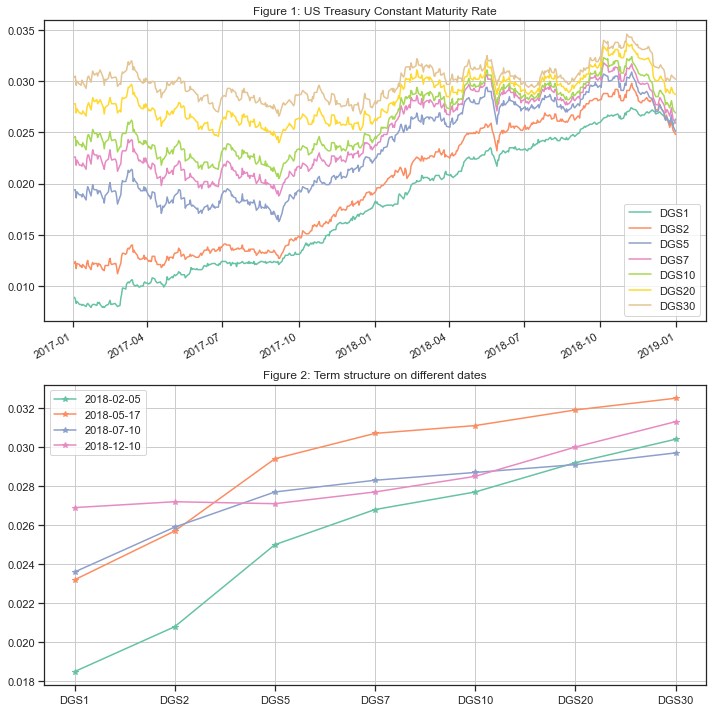

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

from IPython.core.display import HTML
HTML("<style>.container {width:98% !important; }</style>")
plt.rcParams['axes.facecolor'] = 'white'
import seaborn as sns
plt.rcParams['axes.facecolor'] = 'white'
sns.set_palette("Set2")

from fredapi import Fred
fred = Fred(api_key='cd9a27c9afcd4ee82ec0be135fb8b223')

# get data
startDate = '2017-01-01'
endDate = '2018-12-31'
df = []
ids = ['DGS{}'.format(i) for i in [1,2,5,7,10,20,30]]
for s in ids:
    df.append(fred.get_series(s, observation_start=startDate, observation_end=endDate)/100)
  
df = pd.concat(df,axis=1)
df.columns = ids
df = df.dropna()

# curve dynamic
fig,(ax,ax2)=plt.subplots(nrows=2,ncols=1,figsize=(10,5*2))
df.plot(grid=True,title='Figure 1: US Treasury Constant Maturity Rate',ax=ax)
x = df.loc[[datetime(2018,2,5),datetime(2018,5,17),datetime(2018,7,10),datetime(2018,12,10)],:]
x.index = [t.date() for t in x.index]
ax2.plot(x.T.index,x.T,marker='*')
ax2.legend(x.index)
ax2.grid(True)
ax2.set_title('Figure 2: Term structure on different dates')
fig.tight_layout()

The yield/rate time series of different maturities are shown in Figure 1. All curves move in the same direction, indicating that some common factors drive the yield dynamic. In Figure 2, we can see the yield curve term structure on different dates. In contrast to the previous figure, here, one can distinctly see the inconsistencies in the dynamics, and it is evident that in some periods, the movement is quite the opposite.

Let us consider in more detail the different types of changes between the dates:

* **Level Change**: The level shock modifies the interest rates of all maturities in nearly equal amounts, inducing a parallel shift that changes the level of the entire yield curve. An example of level change can be seen by observing the curves for 2018-02-05 and 2018-05-17. Both are moving in the same direction with almost identical slopes, and the only difference is the level: the green curve is shifted compared to the orange one.

* **Slope Change**: The shock to the slope factor increases short-term interest rates by much more than long-term interest rates, so the yield curve becomes less abrupt, and its slope decreases. For example, from 2018-05-17 to 2018-12-10, the slope of the curve changed as the short-term yield increased while the long-term yield decreased (DGS2 to DGS5).

* **Curvature change**: The change in curvature reflects how the difference between the medium-long-term premium (i.e., the long-term minus the medium-term rate level) and the short medium-term premium (i.e., the medium-term minus the short-term rate level) changes from each day. In other words, the ”belly” of the curve shifts relatively to variations in short-term and long-term levels daily.

Moreover, the dates 2018-05-17 and 2018-02-05 curves show us a classic example of the so-called standard yield curve, a concave curve with a positive slope. Such a yield curve is considered ”normal” because the market usually requires more compensation for risk under normal conditions. Long-term bonds are subject to more significant risks, such as changes in interest rates and increased potential default risk.

### PCA on Term Structure

We have already noticed that the yield curve dynamics are determined by some common factors, and the PCA allows us to investigate these factors. Consider $X$ as the annualized daily yield change of $p$ maturities on $N$ days. The representation of $X$ is the following:

$$
X=ZV^T
$$

where Z consists of the principal components, and V is the loading matrix. Now, we are definitely prepared to analyze the PCA results.

Text(0.5, 1.0, 'Figure 3: Evolution of PCA Factors 1,2,3')

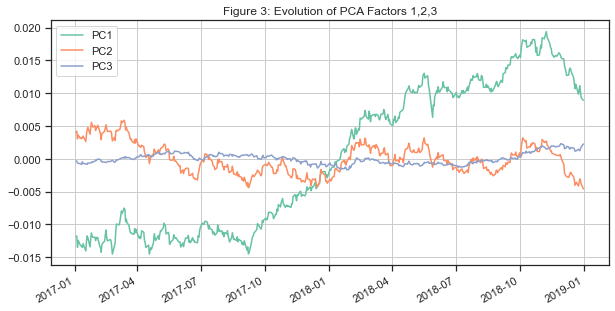

In [3]:
# contruct pca object
from pca import PCABase
pcab = PCABase(df)

# PC
fig,ax=plt.subplots(figsize=(10,5))
l1=pcab.scores().iloc[:,0:3].plot(ax=ax)
ax.grid(True)
ax.set_title('Figure 3: Evolution of PCA Factors 1,2,3')

Figure 3 shows the time series of the first three principal components. The variances of these components are in descending order: PC1 (green) varies a lot, while PC3 (blue) fluctuates around zero. Figure 3.4 indicates that almost 95% of the variation in the data is described by the first principal component, and combined with the second and third components, it is nearly 100%, which means that all of the dynamics of the yield curve can be described by the first three components. In the next section, we will look at the loading matrix V.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


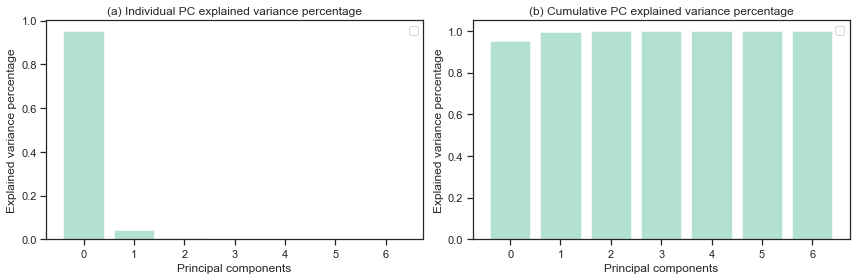

In [5]:
# PCA-explained variance ratio

fig,(ax,ax2) = plt.subplots(figsize=(6*2, 4),ncols=2,nrows=1)
ax.bar(range(pcab.n_features), pcab.cumsum_expvar_ratio()[0], alpha=0.5, align='center')
ax2.bar(range(pcab.n_features), pcab.cumsum_expvar_ratio()[1], alpha=0.5, align='center')
ax.set_ylabel('Explained variance percentage')
ax.set_xlabel('Principal components')
ax.set_title('(a) Individual PC explained variance percentage')
ax.legend(loc='best')
ax2.set_ylabel('Explained variance percentage')
ax2.set_xlabel('Principal components')
ax2.set_title('(b) Cumulative PC explained variance percentage')
ax2.legend(loc='best')
fig.tight_layout()

V is the loading matrix that represents X in the new coordinates. The matrix is presented in Figure (a) and visualized in Figure (b). We can use the loading matrix to determine which PCs have the most significant effect on each bond. A loading close to 0 indicates a weak impact of the variable, and a loading close to $\pm1$ shows a high impact. Let us now take a closer look at the behavior of each PC:

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
DGS1,0.553153,-0.521945,0.406891,0.503280,-0.014236,0.049874,-0.007363
DGS2,0.548462,-0.229310,-0.058753,-0.784664,0.142051,-0.033247,0.078571
DGS5,0.401411,0.187341,-0.458251,0.105166,-0.664757,-0.058601,-0.370652
DGS7,0.330703,0.322376,-0.348364,0.263626,0.146838,0.041370,0.756690
DGS10,0.279229,0.373706,-0.101193,0.142498,0.626985,0.304434,-0.515790
DGS20,0.180465,0.429733,0.390784,0.010568,0.062438,-0.789335,-0.054686
DGS30,0.110360,0.460045,0.580245,-0.173307,-0.345178,0.524912,0.121570


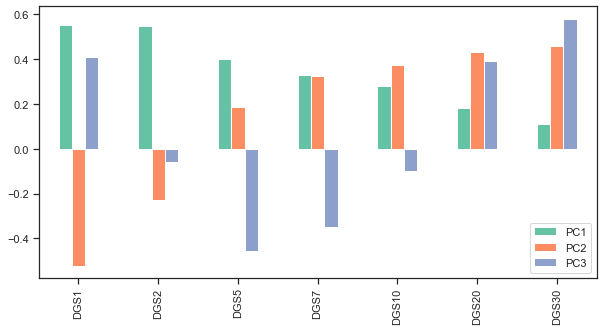

In [6]:
# loading matrix (direction may change but doesn't matter)
V = pd.DataFrame(pcab.pca().components_,index=pcab.pc_names(pcab.n_features),columns=pcab.X.columns)
V.T.iloc[:,0:3].plot(figsize=(10,5),kind='bar')
pcab.cps()

* **PC1**: All loads are positive, implying that the PC1 factor causes the movement of the yield curve in the same direction. Therefore, this factor is responsible for the level change. This reflects that short-term yields tend to move more than long-term yields since the loads on the short end are larger. Moreover, this figure demonstrates that most of the variance is accumulated in PC1.

* **PC2**: The loading increases from a negative value at the short end to a positive value at the long end. Furthermore, it crosses zero once between 2Y and 5Y bonds. This indicates that short-term yields and long-term yields tend to move in different directions, so it describes the change in the slope of the curve. Note that a zero crossing point of the curve is an anchor point; as we can see from the figure, it is the 5Y Bond.

* **PC3**: The loadings from short to long-term cross zero twice, which means that the very short-term and long-term yields move in the same direction while the trough of the curve tends to move in the opposite direction. This factor represents the curvature of the curve in a natural way.


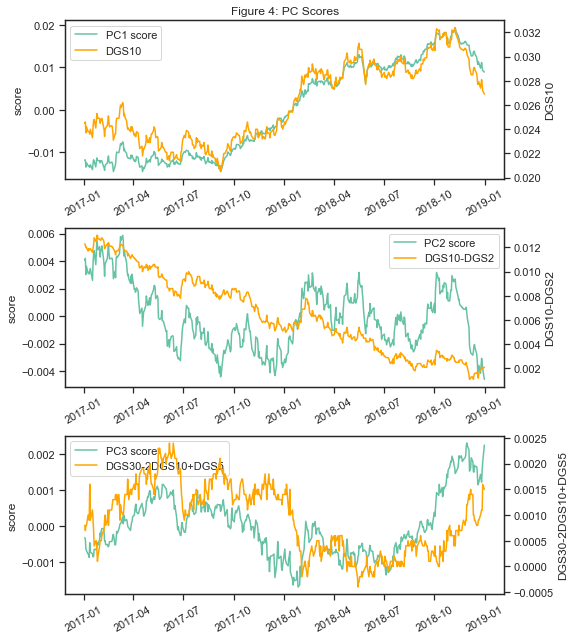

In [9]:
# PC Scores
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(8,3*3))
l1=ax1.plot(pcab.scores()['PC1'])
ax12 = ax1.twinx()
l2=ax12.plot(pcab.X['DGS10'],color='orange')
ax1.tick_params('x',rotation=30)
ax1.set_title('Figure 4: PC Scores')
ax1.legend(l1+l2,['PC1 score','DGS10'])
ax1.set_ylabel('score')
ax12.set_ylabel('DGS10')
# 
l1=ax2.plot(pcab.scores()['PC2'])
ax22 = ax2.twinx()
l2=ax22.plot(pcab.X['DGS10']-pcab.X['DGS2'],color='orange')
ax2.tick_params('x',rotation=30)
ax2.legend(l1+l2,['PC2 score','DGS10-DGS2'],loc='best')
ax2.set_ylabel('score')
ax22.set_ylabel('DGS10-DGS2')

# 
l1=ax3.plot(pcab.scores()['PC3'])
ax32 = ax3.twinx()
l2=ax32.plot(pcab.X['DGS30']-2*pcab.X['DGS10']+pcab.X['DGS5'],color='orange')
ax3.tick_params('x',rotation=30)
ax3.legend(l1+l2,['PC3 score','DGS30-2DGS10+DGS5'],loc='best')
ax3.set_ylabel('score')
ax32.set_ylabel('DGS30-2DGS10+DGS5')
fig.tight_layout()

As discussed previously, the first three principal components represent the internal characteristics of the curve: level, slope, and curvature. To confirm our reasoning, we will choose combinations of bonds that reflect the above factor observations. We can choose any maturity bond to represent the level (PC1) since all bonds have a similar change in level.

The first subplot of Figure 4 uses the 10Y to see how close PC1 fits. Indeed, the green (PC1) and orange (DGS10) plots are almost a match. Since the slope factor (PC2) expands short-term bonds by much larger than long-term bonds, we can represent it as the difference between long-term and short-term bonds: 10Y−2Y. 

The second subplot of Figure 4 shows that although the error is larger than in the previous case, the tendency of the curves is similar. The coefficient curvature (PC3) describes the fact that changes in short-term and long-term bonds go in one direction while medium-term bonds move in another, so let us represent it in the following way: 30Y − 2 × 10Y + 5Y. And the third subplot of Figure 4 shows that our assumption is very close.

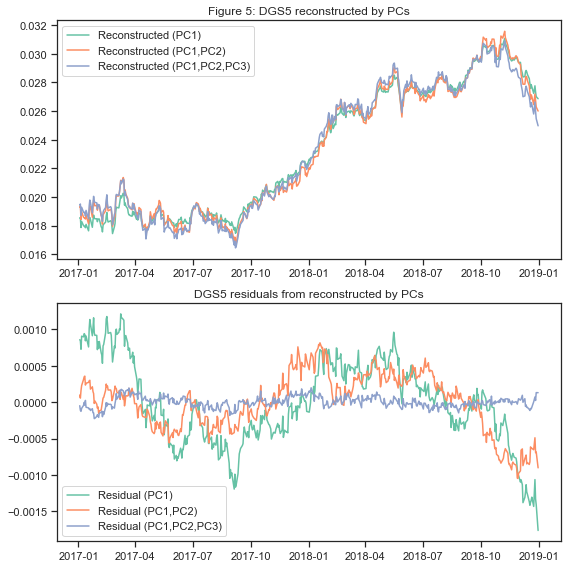

In [11]:
# resconstruction and residuals 5YR
r = 'DGS5'
fig,(ax,ax2)=plt.subplots(figsize=(8,4*2),ncols=1,nrows=2)
ax.plot(pcab.x_projected(1)[r])
ax.plot(pcab.x_projected(2)[r])
ax.plot(pcab.x_projected(3)[r])
ax.legend(['Reconstructed (PC1)','Reconstructed (PC1,PC2)','Reconstructed (PC1,PC2,PC3)'])
ax.set_title('Figure 5: {} reconstructed by PCs'.format(r))

ax2.plot(pcab.residuals(1)[r])
ax2.plot(pcab.residuals(2)[r])
ax2.plot(pcab.residuals(3)[r])
ax2.legend(['Residual (PC1)','Residual (PC1,PC2)','Residual (PC1,PC2,PC3)'])
ax2.set_title('{} residuals from reconstructed by PCs'.format(r))
fig.tight_layout()

When the underlying factors have been found from PCA, we can finally use the first three principal components to approximate the original data $X$. As we observed previously, almost 100% of the variance can be explained by the first three components therefore, we will use those components to construct $\tilde{X}^{(3)}$ using the equations (10) and (11). The corresponding residual $R^{(3)}$ can be calculated via equation (13).

The first subplot of Figure 5 shows the approximation of bond yield 5Y by all PCs in aggregate, and the second subplot of figure Figure 5 shows the corresponding residuals. It can be seen that even just PC1 is quite adequate to obtain a very close result with an error of the order of $10^{−3}$.

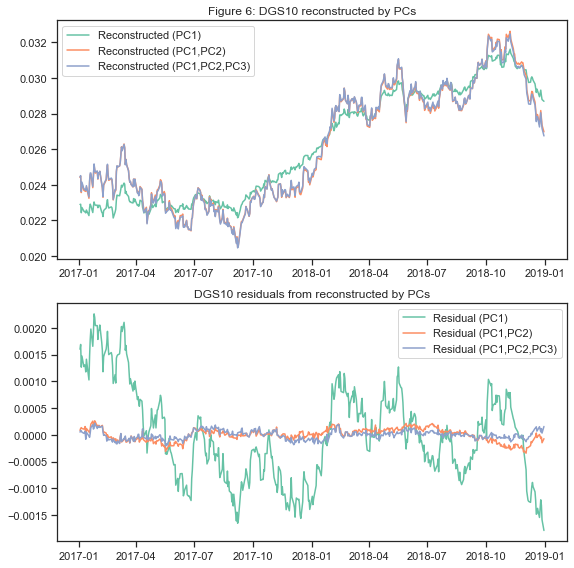

In [13]:
# resconstruction and residuals 5YR
r = 'DGS10'
fig,(ax,ax2)=plt.subplots(figsize=(8,4*2),ncols=1,nrows=2)
ax.plot(pcab.x_projected(1)[r])
ax.plot(pcab.x_projected(2)[r])
ax.plot(pcab.x_projected(3)[r])
ax.legend(['Reconstructed (PC1)','Reconstructed (PC1,PC2)','Reconstructed (PC1,PC2,PC3)'])
ax.set_title('Figure 6: {} reconstructed by PCs'.format(r))

ax2.plot(pcab.residuals(1)[r])
ax2.plot(pcab.residuals(2)[r])
ax2.plot(pcab.residuals(3)[r])
ax2.legend(['Residual (PC1)','Residual (PC1,PC2)','Residual (PC1,PC2,PC3)'])
ax2.set_title('{} residuals from reconstructed by PCs'.format(r))
fig.tight_layout()

Figure 6 shows the 10Y bond approximation: PC1 has the dominant explanatory power; its residuals are about $10^{−3}$. Adding PC2 improves the reconstruction so that the residuals are roughly $10^{−4}$, and including PC3, in addition, makes no appreciable difference. This means that PC1 and PC2 are sufficient to explain the dynamics.


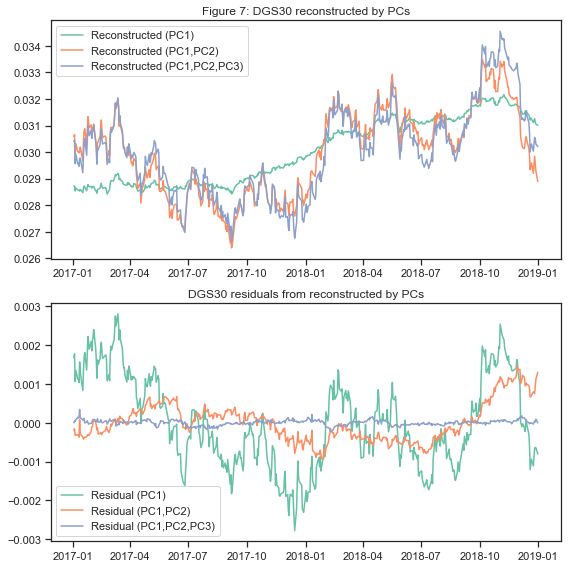

In [14]:
# resconstruction and residuals 5YR
r = 'DGS30'
fig,(ax,ax2)=plt.subplots(figsize=(8,4*2),ncols=1,nrows=2)
ax.plot(pcab.x_projected(1)[r])
ax.plot(pcab.x_projected(2)[r])
ax.plot(pcab.x_projected(3)[r])
ax.legend(['Reconstructed (PC1)','Reconstructed (PC1,PC2)','Reconstructed (PC1,PC2,PC3)'])
ax.set_title('Figure 7: {} reconstructed by PCs'.format(r))

ax2.plot(pcab.residuals(1)[r])
ax2.plot(pcab.residuals(2)[r])
ax2.plot(pcab.residuals(3)[r])
ax2.legend(['Residual (PC1)','Residual (PC1,PC2)','Residual (PC1,PC2,PC3)'])
ax2.set_title('{} residuals from reconstructed by PCs'.format(r))
fig.tight_layout()

Our last approximation is for 30Y bonds, presented in Figure 7. Compared to the 10Y curve, PC2 is more significant in explaining the 30Y trends. Moreover, in this case, the contribution of PC3 is much more substantial.

## Term Structure Analysis During COVID-19 Crisis

Prices of risky assets have fallen precipitously since the onset of the pandemic, with prices of risky assets at the lower end of the recent surge, selling off at half or more of their declines observed in 2008 and 2009. For instance, many large and small equity markets have recorded 30 percent or more price declines at the low end.